Modelo Lineal:           r² = 0.85231
Modelo Exponencial:      r² = 0.7772
Modelo de Potencias:     r² = 0.95109
Modelo de Crecimiento:   r² = 0.9978


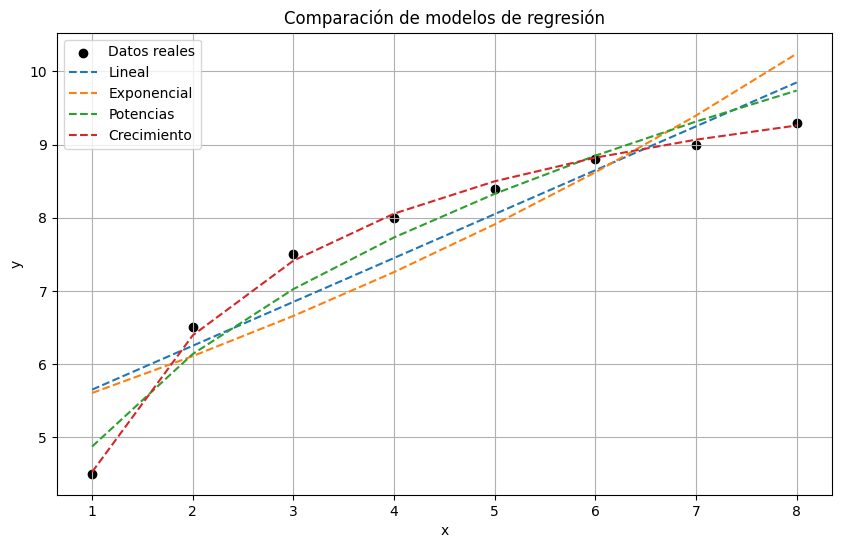

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_r2(y, y_pred):
    St = np.sum((y - np.mean(y))**2)
    Sr = np.sum((y - y_pred)**2)
    return (St - Sr) / St

# Datos del taller
x = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=float)
y = np.array([4.5, 6.5, 7.5, 8.0, 8.4, 8.8, 9.0, 9.3], dtype=float)
n = len(x)

# --- 1. Modelo Lineal ---
A = np.vstack([x, np.ones(n)]).T
params_lin, *_ = np.linalg.lstsq(A, y, rcond=None)
y_lin = params_lin[0]*x + params_lin[1]
r2_lin = calcular_r2(y, y_lin)

# --- 2. Modelo Exponencial: ln(y) = ln(a) + bx ---
ln_y = np.log(y)
params_exp, *_ = np.linalg.lstsq(np.vstack([x, np.ones(n)]).T, ln_y, rcond=None)
b_exp, ln_a_exp = params_exp
alpha_exp = np.exp(ln_a_exp)
y_exp = alpha_exp * np.exp(b_exp * x)
r2_exp = calcular_r2(y, y_exp)

# --- 3. Modelo de Potencias: ln(y) = ln(a) + b*ln(x) ---
ln_x = np.log(x)
params_pow, *_ = np.linalg.lstsq(np.vstack([ln_x, np.ones(n)]).T, ln_y, rcond=None)
b_pow, ln_a_pow = params_pow
alpha_pow = np.exp(ln_a_pow)
y_pow = alpha_pow * x ** b_pow
r2_pow = calcular_r2(y, y_pow)

# --- 4. Modelo de Razón de Crecimiento: 1/y = b/(a*x) + 1/a ---
inv_y = 1 / y
inv_x = 1 / x
params_growth, *_ = np.linalg.lstsq(np.vstack([inv_x, np.ones(n)]).T, inv_y, rcond=None)
b_over_a, one_over_a = params_growth
alpha_growth = 1 / one_over_a
beta_growth = b_over_a * alpha_growth
y_growth = (alpha_growth * x) / (beta_growth + x)
r2_growth = calcular_r2(y, y_growth)

# Resultados
print("Modelo Lineal:           r² =", round(r2_lin, 5))
print("Modelo Exponencial:      r² =", round(r2_exp, 5))
print("Modelo de Potencias:     r² =", round(r2_pow, 5))
print("Modelo de Crecimiento:   r² =", round(r2_growth, 5))

# Gráfica comparativa
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Datos reales')
plt.plot(x, y_lin, label='Lineal', linestyle='--')
plt.plot(x, y_exp, label='Exponencial', linestyle='--')
plt.plot(x, y_pow, label='Potencias', linestyle='--')
plt.plot(x, y_growth, label='Crecimiento', linestyle='--')
plt.title("Comparación de modelos de regresión")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
